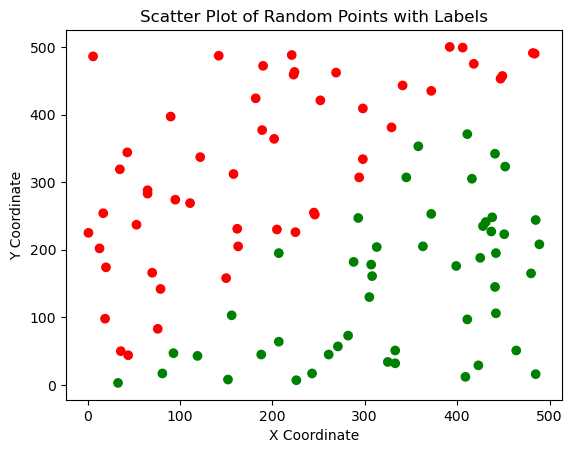

Epoch 1, Accuracy: 99.00%
Epoch 2, Accuracy: 95.00%
Epoch 3, Accuracy: 98.00%
Epoch 4, Accuracy: 97.00%
Epoch 5, Accuracy: 100.00%
Epoch 6, Accuracy: 100.00%
Epoch 7, Accuracy: 100.00%
Epoch 8, Accuracy: 100.00%
Epoch 9, Accuracy: 100.00%
Epoch 10, Accuracy: 100.00%


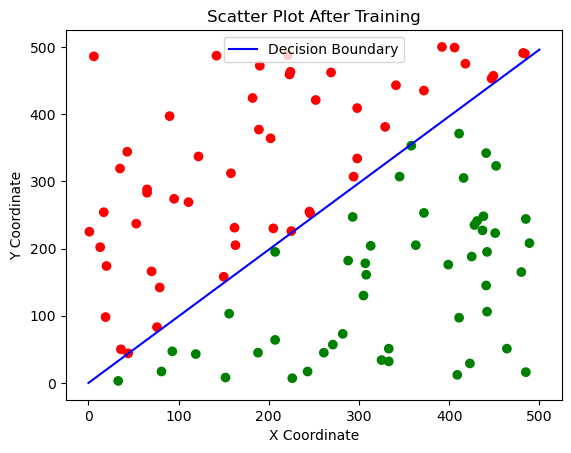

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.label = 1 if x > y else -1
            
    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, label={self.label})"
    
# Step Function
def sign(n):
    if n >= 0:
        return 1
    else:
        return -1

class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = [random.uniform(-1, 1), random.uniform(-1, 1)]
        self.bias = random.uniform(-1, 1)
        self.learning_rate = learning_rate

    # WEIGHTED SUM + ACTIVATION
    def guess(self, inputs):
        total = inputs[0] * self.weights[0] + inputs[1] * self.weights[1]
        total += self.bias
        return sign(total)

    def train(self, inputs, label):
        guess = self.guess(inputs)
        error = label - guess
        self.weights[0] += error * inputs[0] * self.learning_rate
        self.weights[1] += error * inputs[1] * self.learning_rate
        self.bias += error * self.learning_rate
        
        
    def accuracy(self, points):
        correct = 0
        for point in points:
            inputs = [point.x, point.y]
            if self.guess(inputs) == point.label:
                correct += 1
        return correct / len(points)
       
def main():
    
    Points = []
    for i in range(0,100):
        new_point = Point(x = random.randint(0,500), y = random.randint(0,500))
        #print(new_point)
        Points.append(new_point)

    x_coords = [point.x for point in Points]
    y_coords = [point.y for point in Points]
    colors = ['red' if point.label == -1 else 'green' for point in Points]

    plt.scatter(x_coords, y_coords, c=colors)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Random Points with Labels')
    plt.show()
    
    perceptron = Perceptron()
    
    # Training
    epochs = 10
    for epoch in range(epochs):
        for point in Points:
            inputs = [point.x, point.y]
            target = point.label
            perceptron.train(inputs, target)
        accuracy = perceptron.accuracy(Points)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy * 100:.2f}%")
            
            
    # visualization
    predictions_colors = ['green' if perceptron.guess([point.x, point.y]) == 1 else 'red' for point in Points]

    plt.scatter(x_coords, y_coords, c=predictions_colors)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot After Training')
    
    # decision boundary line
    x_vals = np.linspace(0, 500, 100)
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, label='Decision Boundary', color='blue')
    
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()